# DanishGridInsight Project: Step 01 Feature Engineering Pipeline

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 📖 TABLE OF CONTENTS

- [Section 1]()
  - [Subsection 1]()
    - [Subsubsection 1]()
    - [Subsubsection 2]()
  - [Subsection 2]()
    - [Subsubsection 1]()
    - [Subsubsection 2]()
- [Section 2]()
  - [Subsection 1]()
    - [Subsubsection 1]()
    - [Subsubsection 2]()
  - [Subsection 2]()
    - [Subsubsection 1]()
    - [Subsubsection 2]()

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Data Source

We used an open API that provides hourly energy consumption values for all the energy consumer types within Denmark.

They provide an intuitive interface where you can easily query and visualize the data. [You can access the data here](https://www.energidataservice.dk/tso-electricity/ConsumptionDE35Hour).

The data has 4 main attributes:

- **Hour UTC:** the UTC datetime when the data point was observed.

- **Price Area:** Denmark is divided into two price areas: DK1 and DK2 — divided by the Great Belt. DK1 is west of the Great Belt, and DK2 is east of the Great Belt.

- **Consumer Type:** The consumer type is the Industry Code DE35, owned and maintained by Danish Energy, a non-commercial lobby organization for Danish energy companies. The code is used by Danish energy companies.

- **Total Consumption:** Total electricity consumption in kWh

The data points have an hourly resolution. For example: "2023—04—15 21:00Z", "2023—04—15 20:00Z", "2023—04—15 19:00Z", etc.

**We will model the data as multiple time series. Each unique price area and consumer type tuple represents its unique time series.**

Thus, **we will build a model that independently forecasts the energy consumption for the next 24 hours for every time series.**

**Note 1:** The observations have a lag of 15 days! But for our demo use case, that is not a problem, as we can simulate the same steps as it would be in real-time.

**Note 2:** [Above dataset](https://www.energidataservice.dk/tso-electricity/ConsumptionDE35Hour) is no longer updated and will be removed from Energi Data Service in December 2023. For data after June 2023, [please find data here](https://www.energidataservice.dk/tso-electricity/ConsumptionDK3619codehour). The observations for this new dataset have a lag of 8 days & 11 hours.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Feature Engineering Pipeline

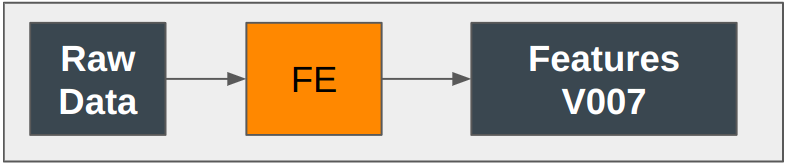

In [1]:
# Feature Engineering Pipeline

from IPython import display
display.Image("data/images/Step_01_Feature_Engineering_Pipeline-01.png")

**Input:** one or multiple raw data sources

In the Feature Engineering pipeline, we will do the standard data preprocessing, such as:

- cleaning data

- standardize the data

- vectorize the data

- aggregations $\implies$ create new features

❌ One thing to avoid is doing our transformations here, as they depend on our train-test split or adding redundancy in our feature store.

Note that in bigger projects, we will move the cleaning and standardization steps into our data pipeline.

**Output:** A new version of our features (e.g., “Features v007”).

In Step 01, we will focus on the components highlighted in blue: **API**, **Feature Engineering** and the **Feature Store** as we can see in the diagram below.

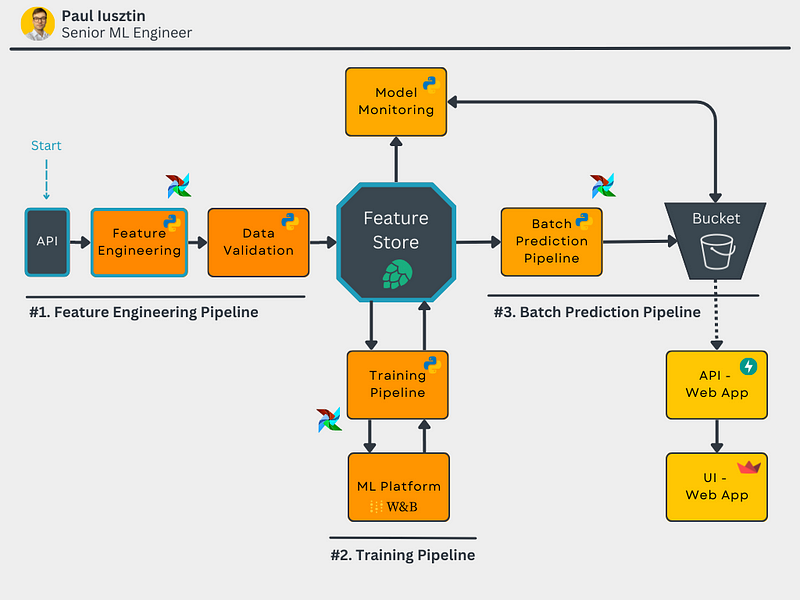

In [2]:
# Batch Serving Architecture with Feature Engineering Pipeline components highlighted in blue

from IPython import display
display.Image("data/images/Step_01_Feature_Engineering_Pipeline-02.png")

**Feature Engineering Tools:** Pandas, Spark, Polars, PyTorch, TensorFlow

**Feature Stores:** Hopsworks, Feast

In this project, we use **Pandas** and **Hopsworks**.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. ETL Pipeline

An **ETL pipeline** is a data processing pipeline that stands for **Extract, Transform, Load**. It refers to the steps involved in gathering data from multiple sources, transforming it into a usable format, and then loading it into a data store, like a database or data warehouse. Here's a quick breakdown of each component:

1. **Extract:**

    - Data is collected or extracted from various sources, which could be databases, APIs, files, or any other data source.

    - The goal is to gather raw data that might be in different formats or structures.

2. **Transform:**
    
    - Once data is extracted, it needs to be cleaned, structured, or aggregated to make it useful. This could include filtering, joining tables, handling missing values, and other transformations.
    
    - In ML workflows, this might also involve feature engineering or creating new metrics.
    
    - The goal is to make data consistent and suitable for the intended purpose (like analysis, ML training, or reporting).

3. **Load:**
    
    - Finally, the transformed data is loaded into a data storage system, such as a data warehouse, a feature store, or a database.
    
    - The data is now ready for use, whether for analytics, business intelligence, or as input to an ML model.

In the context of MLOps, ETL pipelines often feed data into feature stores (like Hopsworks in our case) or directly into ML models for training and predictions. This makes ETL pipelines essential for ensuring high-quality data flows continuously and reliably in production systems.

We will build an ETL pipeline that extracts data from the energy consumption API, pass them through the feature engineering pipeline, which cleans and transforms the features, and loads the features in the feature store for further usage across the system.

As you can see, the feature store stands at the heart of the system.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Theoretical Concepts and Tools

## Batch Serving Architecture

In the batch serving paradigm, we can prepare our data, train our model, and make predictions in an offline fashion. Afterward, we store the predictions in a database from where a client/application will use the predictions down the line. The word batch comes from the idea that we can process multiple samples simultaneously, which in this paradigm is usually valid. We compute all the predictions in our use case and stored them in a blob storage/bucket.

If we would oversimplify our architecture to reflect only the main steps of a batch architecture, this is how it would look like:

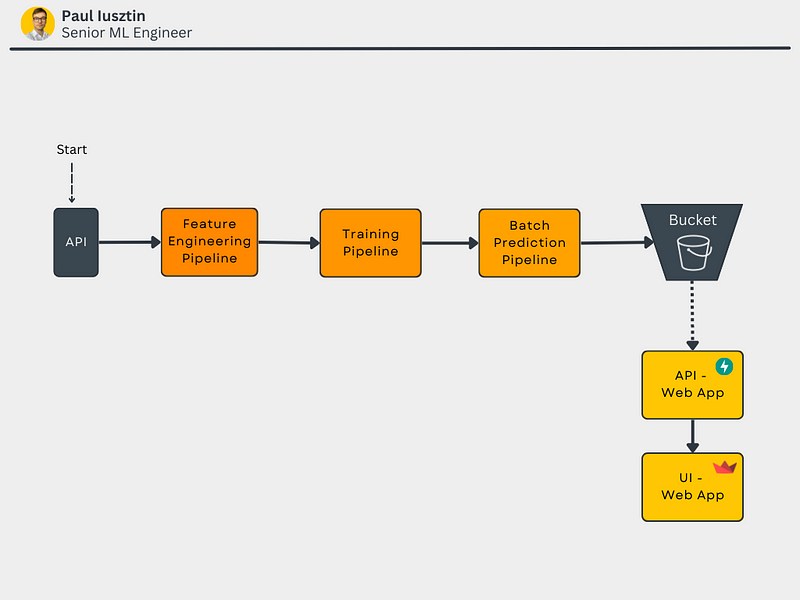

In [1]:
# Simplified Batch Serving Architecture

from IPython import display
display.Image("data/images/Step_01_Feature_Engineering_Pipeline-03.png")

The biggest downside of the batch-serving paradigm is that our predictions will almost always lag. For example, in our case, we predict the energy consumption for the next 24 hours, and because of this lag, our predictions might be 1 hour late.

**Note:**

To learn more about a standardized architecture suggested by Google Cloud, Comet etc that can be leveraged in almost any ML system, check out:

- https://services.google.com/fh/files/misc/practitioners_guide_to_mlops_whitepaper.pdf

- https://go.comet.ml/rs/912-JJP-445/images/eBook-Comet-Standardizing_ML_Experimentation_Process.pdf

- https://ml-ops.org/content/mlops-principles

- https://pauliusztin.medium.com/this-is-what-you-need-to-know-to-build-an-mlops-end-to-end-architecture-c0be1deaa3ce

## Feature Store

The feature store stays at the heart of any ML system. Using a feature store, we can easily store and share features across the system. We can intuitively see a feature store as a fancy database that adds the following features:

- data versioning and lineage

- data validation

- the ability to create datasets

- the ability to hold train/validation/test splits

- two types of storage: offline (cheap, but high latency) and online (more expensive, but low latency).

- time-travel: easily access data given a time window

- hold feature transformation in addition to the feature themselves

- data monitoring, etc.

We choose [**Hopsworks**](https://www.hopsworks.ai/) as our feature store because it is serverless and offers a generous free plan that is more than enough to create this project. Also, Hopsworks is very well designed and provides all the features mentioned above.

**Note:**

To learn more about feature stores, check out:

- https://www.kdnuggets.com/2020/12/feature-store-vs-data-warehouse.html

## Feature Engineering Pipeline

Feature Engineering Pipeline is the piece of code that reads data from one or more data sources, cleans, transforms, validates the data and loads it to a feature store. Thus, it is basically an ETL pipeline.

## Pandas Vs Spark

In this project, we choose to use Pandas as our data processing library because the data is small. Thus, it easily fits in the computer's memory and using a distributed computing framework such as Spark would have made everything too complicated. But in many real-world case scenarios, when the data is too big to fit on a single computer (aka big data), you will use Spark (or another distributed computing tool) to do the exact same steps as in this project.

**Note:**

Check out this article to see how Spark can predict churn with big data:

- https://pub.towardsai.net/this-is-how-you-can-build-a-churn-prediction-model-using-spark-e187b7eca339

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

Difficulty: ${\color{green}{Easy}}$
Difficulty: ${\color{orange}{Medium}}$
Difficulty: ${\color{red}{Hard}}$

In [ ]:
# Deep Learning as subset of ML

from IPython import display
display.Image("data/images/Step_01_Feature_Engineering_Pipeline-01.png")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)